# Home Credit Default Risk

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## Introduction

Kaggle is a web platform and community for data scientist and machine learning engineers where competetitions and datasets are regularly published.

This particular competition is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not. 

The dataset is composed of multiple files with different information about loands taken. 

The competition uses [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
import warnings

%matplotlib inline

In [389]:
data = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/HomeCreditDefaultRisk/files/dataset.csv") 

# Exploratory Data Analysis

**Dataset Basics**

Show the shape of the dataset.

In [18]:
print("The shape of the dataset is:",data.shape)

The shape of the dataset is: (307511, 122)


List all columns in the dataset

In [19]:
print(data.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

In [20]:
data_transposed = data.T
data_transposed.iloc[:5]

,0,1,2,3,4,5,6,7,8,9,...,307501,307502,307503,307504,307505,307506,307507,307508,307509,307510
SK_ID_CURR,100002,100003,100004,100006,100007,100008,100009,100010,100011,100012,...,456245,456246,456247,456248,456249,456251,456252,456253,456254,456255
TARGET,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Revolving loans,...,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M,M,F,M,F,M,...,F,F,F,F,F,M,F,F,F,F
FLAG_OWN_CAR,N,N,Y,N,N,N,Y,Y,N,N,...,N,N,N,N,N,N,N,N,N,N


Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

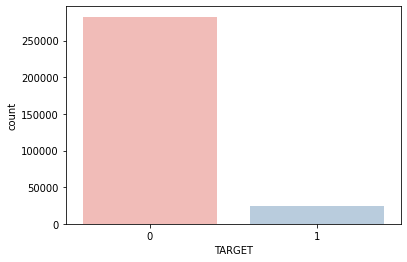

In [74]:
#Total value count
sns.countplot(data=data, x='TARGET', palette='Pastel1')
plt.show()

In [75]:
freq = data['TARGET'].value_counts() 
zeros = freq[0]
ones  = freq[1]
total = len(data)
a = zeros/total
b = ones/total
print("The total value of 0 is of",zeros)
print("The total value of 1 is of",ones)
print("The percentage of the value 0 is of",round(a,4)*100,"%")
print("The percentage of the value 1 is of",round(b,4)*100,"%")

The total value of 0 is of 282686
The total value of 1 is of 24825
The percentage of the value 0 is of 91.93 %
The percentage of the value 1 is of 8.07 %


We can observe the highly Imbalanced Dataset we are dealing with, later on we will be taking care of it

For categorical variables, show the number of distinct values in each column (number of labels)

In [390]:
all_features = data.columns

#Categorical features
categorical_features =["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]	

#Numerical features
difference_1 = set(all_features).difference(set(categorical_features))
difference_2 = set(categorical_features).difference(set(all_features))
numerical_features = list(difference_1.union(difference_2))

print("There are",len(all_features),"features, where",len(numerical_features),"are numrical and",len(categorical_features),"categorical.")

There are 122 features, where 72 are numrical and 50 categorical.


In [59]:
#Show number of unique values per categorical column
for i in range(len(categorical_features)):
  values = data[str(categorical_features[i])].unique()
  for j in range(len(values)):
    if values[j] == "nan":
      values.pop(int(j))

  print("The uniques categorical values for the columns",categorical_features[i],"are",len(values),"\n")

The uniques categorical values for the columns NAME_CONTRACT_TYPE are 2 

The uniques categorical values for the columns CODE_GENDER are 3 

The uniques categorical values for the columns FLAG_OWN_CAR are 2 

The uniques categorical values for the columns FLAG_OWN_REALTY are 2 

The uniques categorical values for the columns NAME_TYPE_SUITE are 8 

The uniques categorical values for the columns NAME_INCOME_TYPE are 8 

The uniques categorical values for the columns NAME_EDUCATION_TYPE are 5 

The uniques categorical values for the columns NAME_FAMILY_STATUS are 6 

The uniques categorical values for the columns NAME_HOUSING_TYPE are 6 

The uniques categorical values for the columns OCCUPATION_TYPE are 19 

The uniques categorical values for the columns WEEKDAY_APPR_PROCESS_START are 7 

The uniques categorical values for the columns ORGANIZATION_TYPE are 58 

The uniques categorical values for the columns FONDKAPREMONT_MODE are 5 

The uniques categorical values for the columns HOUSET

Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

In [61]:
vacios = data.isna().sum()
vacios_sort = vacios.sort_values(ascending= False) 
vacios_sort_head = vacios_sort.head(20)
vacios_sort_head_per = (vacios_sort_head/len(data))
vacios_sort_head_per

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
FLOORSMIN_AVG               0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_AVG             0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_MODE               0.593767
LANDAREA_AVG                0.593767
dtype: float64

In [62]:
#Print to see the whole Missing values columns list
IPython.display.HTML(pd.DataFrame(data.isna().sum()).to_html())

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12


## Analyzing distribution and Correlations of variables

Show the distribution of credit amounts

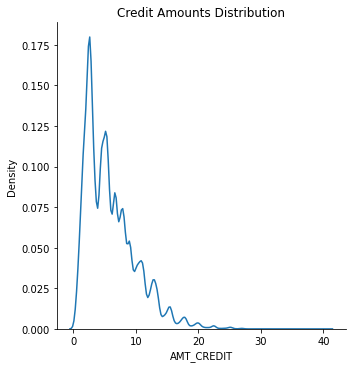

In [63]:
#Distribution of credit amounts
sns.displot(data=data, x=data["AMT_CREDIT"]/100000, kind="kde").set(title='Credit Amounts Distribution') #by 100k
plt.show()

Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

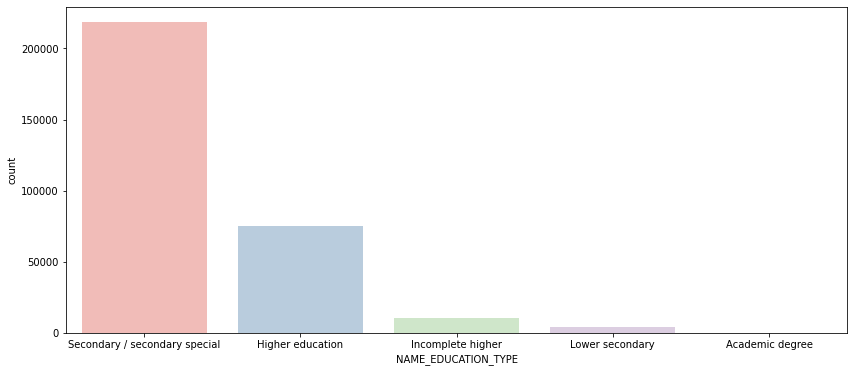

In [64]:
plt.figure(figsize=(14,6))
sns.countplot(data=data, x='NAME_EDUCATION_TYPE', palette='Pastel1')
plt.show()

In [65]:
freq_0 = data['NAME_EDUCATION_TYPE'].value_counts() 
secondary     = freq_0[0]
higher_ed     = freq_0[1]
inc_higher    = freq_0[2] 
low_secondary = freq_0[3]
academic_deg  = freq_0[4]

a = secondary/total
b = higher_ed/total
c = inc_higher/total
d = low_secondary/total
e = academic_deg/total

print("The total value of persons with the Secondary school as it maximum educational level is of",secondary,"with a percentage of",round(a,3)*100,"%")
print("The total value of persons with Higher education as it maximum educational level is of",higher_ed,"with a percentage of",round(b,4)*100,"%")
print("The total value of persons with Incomplete Higher education as it maximum educational level is of",inc_higher,"with a percentage of",round(c,4)*100,"%")
print("The total value of persons without having finished Secondary school as it maximum educational level is of",low_secondary,"with a percentage of",round(d,4)*100,"%")
print("The total value of persons with an Academical degree as it maximum educational level is of",academic_deg,"with a percentage of",round(e,4)*100,"%")

The total value of persons with the Secondary school as it maximum educational level is of 218391 with a percentage of 71.0 %
The total value of persons with Higher education as it maximum educational level is of 74863 with a percentage of 24.34 %
The total value of persons with Incomplete Higher education as it maximum educational level is of 10277 with a percentage of 3.34 %
The total value of persons without having finished Secondary school as it maximum educational level is of 3816 with a percentage of 1.24 %
The total value of persons with an Academical degree as it maximum educational level is of 164 with a percentage of 0.05 %


Plot the distribution of ocupation of the loan applicants

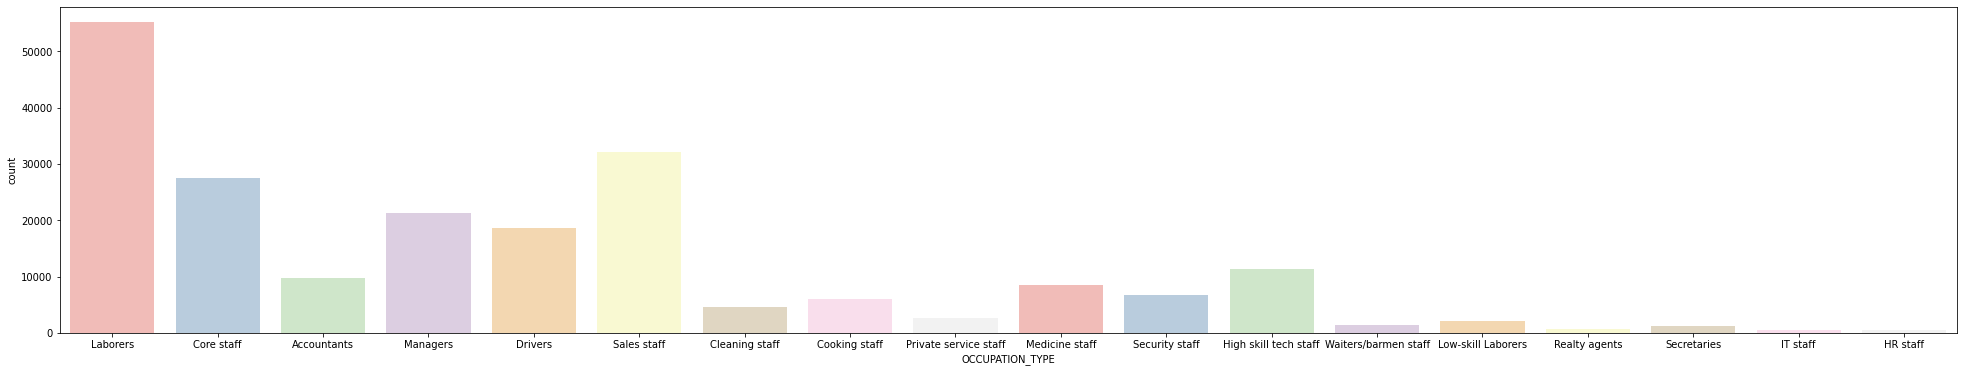

In [66]:
#Distribution pf the applicant´s occupations
plt.figure(figsize=(34,6))
sns.countplot(data=data, x="OCCUPATION_TYPE", palette='Pastel1')
plt.show()

Plot the family status of the applicants

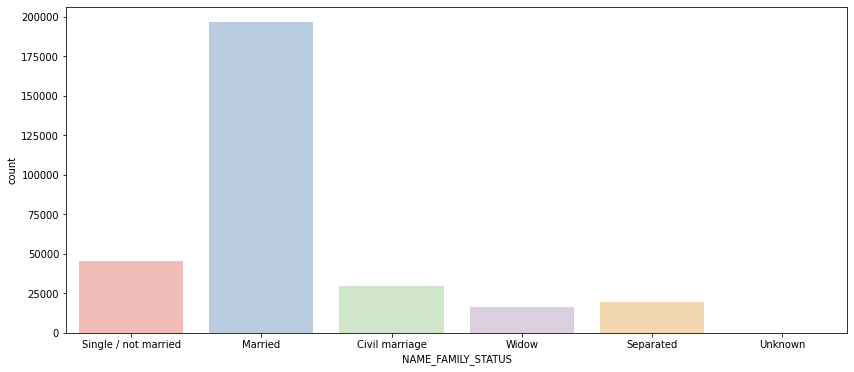

In [67]:
#Family status
plt.figure(figsize=(14,6))
sns.countplot(data=data, x="NAME_FAMILY_STATUS", palette='Pastel1')
plt.show()

Plot the income type of applicants grouped by the target variable

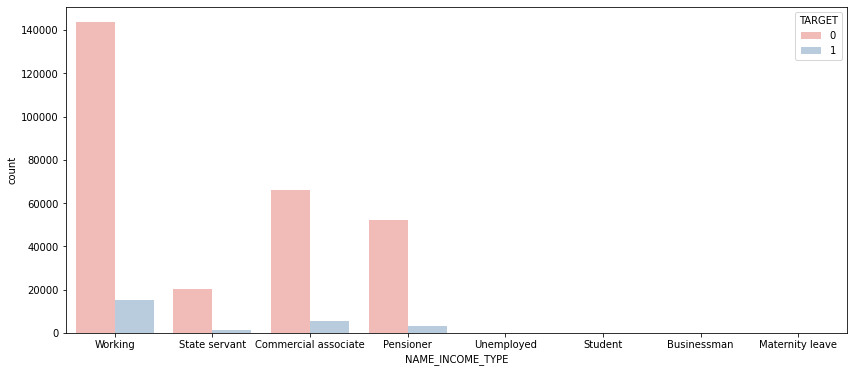

In [68]:
#Income type of applicants by target variable
plt.figure(figsize=(14,6))
sns.countplot(data=data, x="NAME_INCOME_TYPE", hue="TARGET", palette='Pastel1')
plt.show()

# Dropping Variables Correlated

When you have two independent variables that are highly correlated, you definitely should remove one of them because you run into the multicollinearity conundrum and your regression model's coefficients related to the two highly correlated variables will be unreliable. 

In plain English..., if two variables are highly correlated they will obviously impart nearly exactly the same information to your model. But, by including both you are actually weakening the model. You are not adding incremental information. Instead, you are infusing your model with noise.

OBS: It will not be possible to plot the Correlation Matrix due to the high amount of variables present.

In [391]:
def correlation(dataset, threshold):
    deleted = [] #All columns deleted
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # Getting the name of column
                deleted.append(colname)
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # Deleting the column from the dataset

    print("The columns eliminated are:", deleted, "\n")
    print(dataset.shape)

    return deleted

In [392]:
cols_deleted = correlation(data, 0.95)

The columns eliminated are: ['AMT_GOODS_PRICE', 'REGION_RATING_CLIENT_W_CITY', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE'] 

(307511, 91)


For future convinience I am going to update the Numerical and Categorical Features lists

In [393]:
all_features = data.columns

new_categorical_features = set(categorical_features) - set(cols_deleted)
new_numerical_features  = set(numerical_features) - set(cols_deleted)

new_categorical_features = list(new_categorical_features)
new_numerical_features   = list(new_numerical_features)

print("There are",len(all_features),"features, where",len(new_numerical_features),"are numerical and",len(new_categorical_features),"categorical.")

There are 91 features, where 42 are numerical and 49 categorical.


# Preprocesing

- Error data elimination
- Correct outliers/anomalous values in numerical columns
- Impute values for all columns with missing data (use median as imputing value)
- Splitting the Dataset
- Encode categorical features and align Train and Test features
- Feature scaling

In [131]:
data_c = data.copy()

In [132]:
preprocesing.error_elimination(data_c)

There are 55374 clients with 365243 as a value
There are 0 clients with 365243 as a value


In [137]:
new_numerical_features.remove("TARGET")
X_train, X_test, y_train, y_test = preprocesing.data_preprocessing(data_c, new_numerical_features, new_categorical_features, all_features)

In [138]:
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (206032, 244) y_train.shape (206032,)
X_test.shape (101479, 244) y_test.shape (101479,)


# Handling Imbalanced Data

As it has been shown, we are dealing with a highly Imbalanced Dataset (the percentage of the value 0 is of 91.93% and of the value 1 is of 8.07%). To deal with this kind of problems there are two possible approaches:

1- Undersampling

Steps:
- The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the
class column to determine the amount for each label)
- Once we determine how many instances are considered non-returned loans, we should
bring the returned transactions to the same amount (assuming we want a 50/50 ratio)
- After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with
regards to our classes. Then the next step we will implement is to shuffle the data to see if our models
can maintain a certain accuracy everytime we run this script.

Note: The main issue with "Undersampling" is that we run the risk that our classification models
will not perform as accurate as we would like to since there is a great deal of information loss (bringing 24825
non-returned transaction from 282686 returned).

2- Oversampling

We are going to use the SMOTE technique (Synthetic Minority Over-sampling Technique). Unlike Random
UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes.

Understanding SMOTE:

- Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach
an equal balance between the minority and majority class.
- Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the
minority class, in between these distances it creates synthetic points.
- Final Effect: More information is retained since we didn't have to delete any rows unlike in random
undersampling.
- Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random undersampling, it will take more time to train since no rows are eliminated as previously stated.

## Undersampling

In [140]:
#Concatenate X_train and y_train
y_train = y_train.astype(int)
data_conca = pd.concat([X_train, y_train], axis=1)

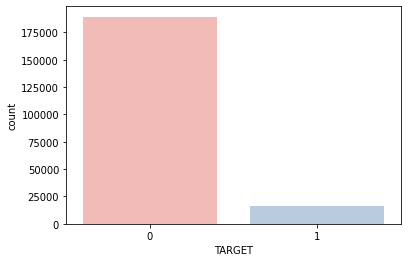

0    189399
1     16633
Name: TARGET, dtype: int64
The total value of 0 is of 189399
The total value of 1 is of 16633
The percentage of the value 0 is of 91.93 %
The percentage of the value 1 is of 8.07 %


In [142]:
#Total value count
sns.countplot(data=data_conca, x='TARGET', palette='Pastel1')
plt.show()

#Evaluate the amount of returned and Non-returned loans
freq = data_conca['TARGET'].value_counts()
print(freq)
zeros = freq[0]
ones  = freq[1]
total = len(data_conca)
a = zeros/total
b = ones/total
print("The total value of 0 is of",zeros)
print("The total value of 1 is of",ones)
print("The percentage of the value 0 is of",round(a,4)*100,"%")
print("The percentage of the value 1 is of",round(b,4)*100,"%")

In [143]:
#Lets shuffle the data before creating the subsamples
data_conca = data_conca.sample(frac=1)

#Amount of Non returned loans classes 24825 rows.
non_returned_data_conca = data_conca.loc[data_conca['TARGET'] == 1]
returned_data_conca = data_conca.loc[data_conca['TARGET'] == 0][:16633]

#Combine the fraud and non fraud rows
normal_distributed_data_conca = pd.concat([returned_data_conca , non_returned_data_conca])

#Shuffle dataframe rows
undersampled_data = normal_distributed_data_conca.sample(frac=1, random_state=42)

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: TARGET, dtype: float64


Text(0.5, 1.0, 'After')

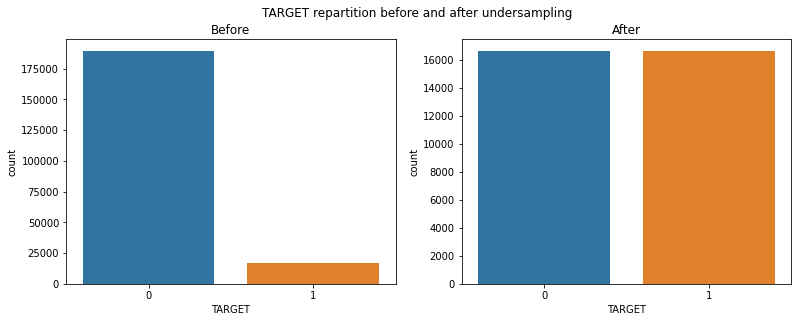

In [144]:
# Check class distribution after undersampling
print('Distribution of the Classes in the subsample dataset')
print(undersampled_data['TARGET'].value_counts()/len(undersampled_data))

#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="TARGET", data=data_conca, ax=axs[0])
sns.countplot(x="TARGET", data=undersampled_data, ax=axs[1])
fig.suptitle("TARGET repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [145]:
undersampled_data.to_csv("Undersampled_dataset.csv")

## Oversampling

In [147]:
from imblearn.over_sampling import SMOTE

In [148]:
X_train_c, y_train_c = X_train.copy(), y_train.copy()

#Tranformation
X_train_c = X_train_c.to_numpy()
y_train_c = y_train_c.to_numpy()
print(type(X_train_c))
print(type(y_train_c))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [149]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_c == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_c == 0)))
  
sm = SMOTE(random_state = 2)
X_smoted, y_smoted = sm.fit_resample(X_train_c, y_train_c.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_smoted.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smoted.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_smoted == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smoted == 0)))

Before OverSampling, counts of label '1': 16633
Before OverSampling, counts of label '0': 189399 

After OverSampling, the shape of train_X: (378798, 244)
After OverSampling, the shape of train_y: (378798,) 

After OverSampling, counts of label '1': 189399
After OverSampling, counts of label '0': 189399


In [150]:
a = np.asarray(X_smoted)
b = np.asarray(y_smoted)

np.savetxt("X_smoted.csv", a, delimiter=",")
np.savetxt("y_smoted.csv", b, delimiter=",")

## Checking Separation of Classes with TSNE (t-distributed Stochastic Neighbor Embedding) and PCA (Principal Component Analysis).

The main Motivation to do so, is the seek of Visualizing the "separability" of the classes. To do so, a Dimensionality Reduction should be done.

**Principal Component Analysis**

PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed. 

**T-distributed Stochastic Neighbor Embedding**

Sometimes called nonlinear dimensionality reduction. What that means is this algorithm allows us to separate data that cannot be separated by any straight line.
Is mostly used to understand high-dimensional data and project it into low-dimensional space (like 2D or 3D).

In [152]:
import visualization

Let´s split this analysis in two phases, firstly I am gonna see how it performed with the Dataset Undersampled and then Oversampled

### PCA Analaysis with Undersampled Data

In [151]:
l = undersampled_data.copy()
print("Dataset Shape:", l.shape)

Dataset Shape: (33266, 245)


In [155]:
#Variable Declarations
X, y = l.drop(['TARGET'], axis=1), l['TARGET']
print(X.shape, type(X))
print(y.shape, type(y))

#Tranformation
X = X.to_numpy()
y = y.to_numpy()
print(type(X))
print(type(y))

(33266, 244) <class 'pandas.core.frame.DataFrame'>
(33266,) <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


First, let´s make a demonstration of how the Plot would be without considering all the varaibles and just choosing the first two... 

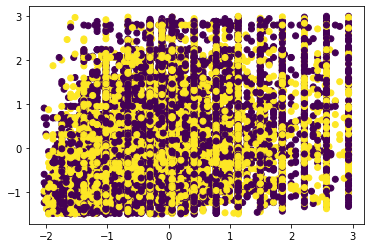

In [156]:
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

As we can see this do not give you any "valuable" nor clear information, as we have more than 244 features...

In [157]:
from sklearn.decomposition import PCA

In [162]:
pca = PCA(2)
principalComponents = pca.fit_transform(X)
print(principalComponents.shape)

(33266, 2)


We have to determine how much variation each principal component accounts for

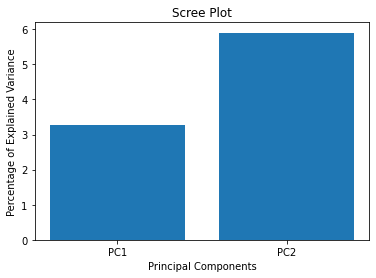

In [163]:
per_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:2] #If you want to see how much variation each PCA retianed, eliminate the np.cumsum as on the example above
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()

Neither the first two Principal Components represent retain well enough the whole information, nor the first three ones. So, the plots we are going to show are not reliable, but at least they are a little bit more than the firts one which randomly picked the first two rows of X.

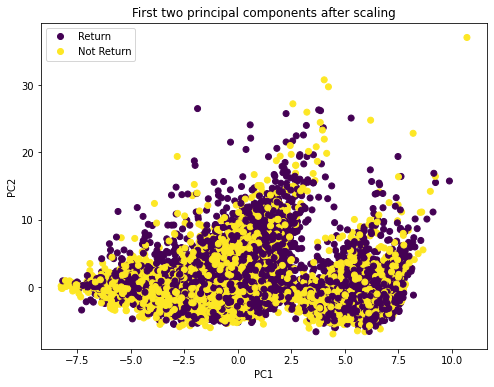

In [169]:
visualization.plot_PCA_2D(X, y)

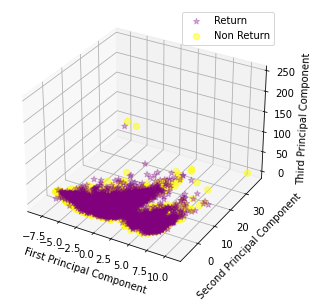

In [170]:
visualization.plot_PCA_3D(X,y)

We can observe that in both of the plots shown above, you can not distinguish any class with just the first component analysis.

### PCA Analaysis with Oversampled Data

In [173]:
pca = PCA(2)
principalComponents = pca.fit_transform(X_smoted)
print(principalComponents.shape)

(378798, 2)


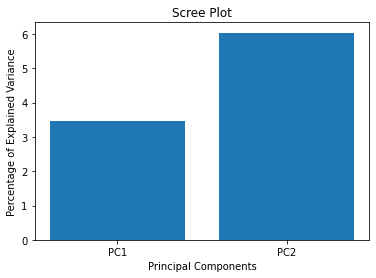

In [174]:
per_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:2] #If you want to see how much variation each PCA retianed, eliminate the np.cumsum as on the example above
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()

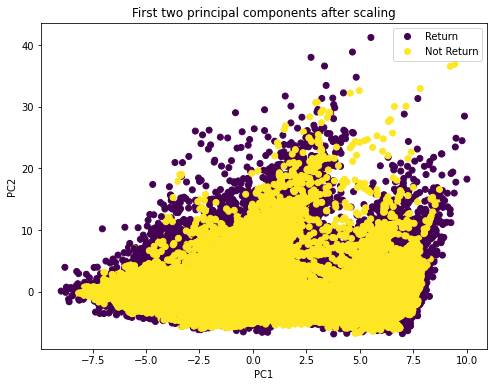

In [176]:
visualization.plot_PCA_2D(X_smoted, y_smoted)

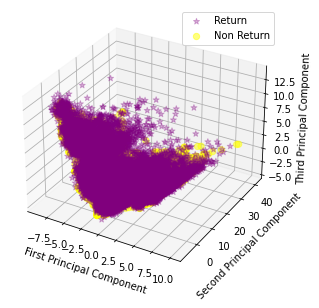

In [177]:
visualization.plot_PCA_3D(X_smoted,y_smoted)

Same conclusion as the one mentioned for the Undersampled dataset

# Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

The idea is to perform this analysis with both, Undersampled and Oversampled datasets, in order to see the difference in the model performance.

## Undersampled Dataset

In [333]:
undersampled_data = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/HomeCreditDefaultRisk/Undersampled_dataset.csv", index_col=0)

In [334]:
X_train, y_train = undersampled_data.drop(["TARGET"], axis=1), undersampled_data["TARGET"]

In [335]:
X_train, y_train = X_train.to_numpy(), y_train.to_numpy()

In [336]:
X_test_under, _, y_test_under,_ = train_test_split(X_test, y_test, test_size=0.90, random_state=42, stratify=y_test)

In [337]:
print("X_train shape", X_train.shape, "X_train type", type(X_train))
print("X_test shape", X_test.shape, "X_test type", type(X_test))
print("y_train shape", y_train.shape, "y_train type", type(y_train))
print("y_test shape", y_test.shape, "y_test type", type(y_test))
print("X_test_under shape", X_test_under.shape, "y_train type", type(X_test_under))
print("y_test_under shape", y_test_under.shape, "y_test_under type", type(y_test_under))

X_train shape (33266, 244) X_train type <class 'numpy.ndarray'>
X_test shape (101479, 244) X_test type <class 'numpy.ndarray'>
y_train shape (33266,) y_train type <class 'numpy.ndarray'>
y_test shape (101479,) y_test type <class 'numpy.ndarray'>
X_test_under shape (10147, 244) y_train type <class 'numpy.ndarray'>
y_test_under shape (10147,) y_test_under type <class 'numpy.ndarray'>


In [223]:
import evaluation
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, learning_curve

import warnings
warnings.filterwarnings("ignore")

In [351]:
import importlib
importlib.reload(evaluation)
importlib.reload(visualization)

<module 'visualization' from '/Users/carolinapeinado/Desktop/Santi/HomeCreditDefaultRisk/visualization.py'>

### Logistic Regression

In [340]:
lr = LogisticRegression(max_iter=100000)
scores = cross_validate(lr, X_train, y_train, scoring="neg_log_loss", cv=5, return_train_score=True)

In [343]:
error_cv = evaluation.calculating_error(scores, "test_score")
error_tr = evaluation.calculating_error(scores, "train_score")
print(f"Training Log Loss Error {error_tr:0.2f}, CV Log Loss Error {error_cv:0.2f}")
print('Train/Validation: {}'.format(round(error_cv/error_tr, 1)))

Training Log Loss Error 0.59, CV Log Loss Error 0.60
Train/Validation: 1.0


In [344]:
train_sizes, train_scores, validation_scores = learning_curve(lr, X_train, y_train, cv=5, scoring="neg_log_loss", n_jobs=-1, train_sizes=[1000,5000,10000,15000,20000], shuffle=True, random_state=1)

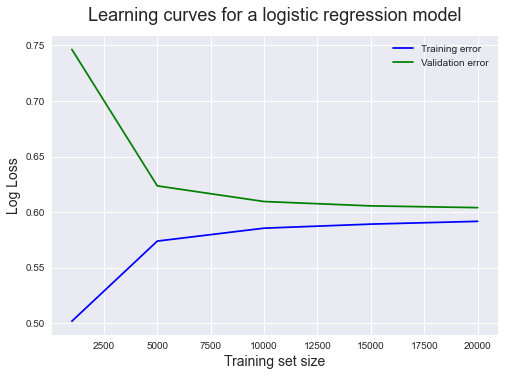

In [347]:
visualization.plot_learning_curve(train_sizes, train_scores, validation_scores, "Log Loss", "Training set size", "Learning curves for a logistic regression model")

Diagnosing Bias and Variance, we do not have a big gap between curves, neither mathematically (0.01) nor visually. Hence, we could say we do not have a variance problem. Then, we could not say that the 0.60 of the validation error is high, on the other hand, it´s regular. The same for the 0.59 of the training error, hence, we are not facing a bias problem. Finally, the validation curve had converged towards the training one, so the addition of more data would not be of much sense...

I would say that the model is well fitted and to improve the performance we should try another learning algorithm, because with this one we have reached its maximum peek (or really near).

### RandomForestClassifier

The common pattern with this model is that if you do not add them some regularizers they will overfit, so let´s start the analysis with that addition.

In [360]:
parameters = {
    'max_features':(1, 2, 3, 4, 5, 'sqrt', 'log2','None'),
    'max_depth' : [1,2,3,4,5,'None'],
    'criterion' :['gini', 'entropy', 'log_loss'],
    'min_samples_leaf':[1, 2, 3, 4, 5, 6], 
    }

estimator = RandomForestClassifier(random_state=1)
cv=3
scoring="neg_log_loss"

best_grid = evaluation.grid_search(estimator, parameters, cv, scoring, X_train, y_train)

The time it takes to fit the model is 2148 seconds.
Best params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4}


In [361]:
evaluation.get_errors(best_grid.cv_results_)

Training Log Loss 0.64, CV Log Loss 0.64
Train/Validation: 1.0


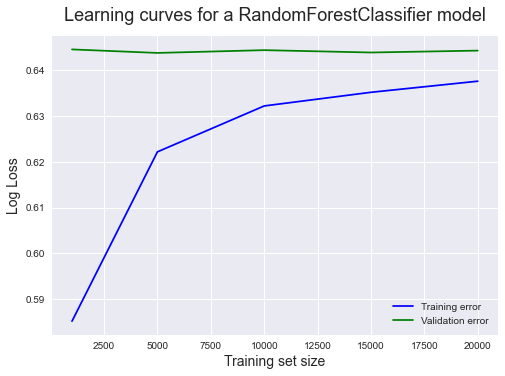

In [364]:
train_sizes, train_scores, validation_scores = learning_curve(best_grid.best_estimator_, X_train, y_train, cv=5, scoring="neg_log_loss", n_jobs=-1, train_sizes=[1000,5000,10000,15000,20000], shuffle=True, random_state=1)
visualization.plot_learning_curve(train_sizes, train_scores, validation_scores, "Log Loss", "Training set size", "Learning curves for a RandomForestClassifier model")

## Oversampled Dataset

In [365]:
print(X_smoted.shape, y_smoted.shape, X_test.shape, y_test.shape)

(378798, 244) (378798,) (101479, 244) (101479,)


In [366]:
print("X_train shape", X_smoted.shape, "X_train type", type(X_smoted))
print("X_test shape", X_test.shape, "X_test type", type(X_test))
print("y_train shape", y_smoted.shape, "y_train type", type(y_smoted))
print("y_test shape", y_test.shape, "y_test type", type(y_test))

X_train shape (378798, 244) X_train type <class 'numpy.ndarray'>
X_test shape (101479, 244) X_test type <class 'numpy.ndarray'>
y_train shape (378798,) y_train type <class 'numpy.ndarray'>
y_test shape (101479,) y_test type <class 'numpy.ndarray'>


### Logistic Regression

In [367]:
lr = LogisticRegression(max_iter=100000)
scores = cross_validate(lr, X_smoted, y_smoted, scoring="neg_log_loss", cv=5, return_train_score=True)

In [368]:
error_cv = evaluation.calculating_error(scores, "test_score")
error_tr = evaluation.calculating_error(scores, "train_score")
print(f"Training Log Loss Error {error_tr:0.2f}, CV Log Loss Error {error_cv:0.2f}")
print('Train/Validation: {}'.format(round(error_cv/error_tr, 1)))

Training Log Loss Error 0.57, CV Log Loss Error 0.57
Train/Validation: 1.0


In [369]:
train_sizes, train_scores, validation_scores = learning_curve(lr, X_smoted, y_smoted, cv=5, scoring="neg_log_loss", n_jobs=-1, train_sizes=[1000,10000,50000,100000,150000,200000,250000,300000], shuffle=True, random_state=1)

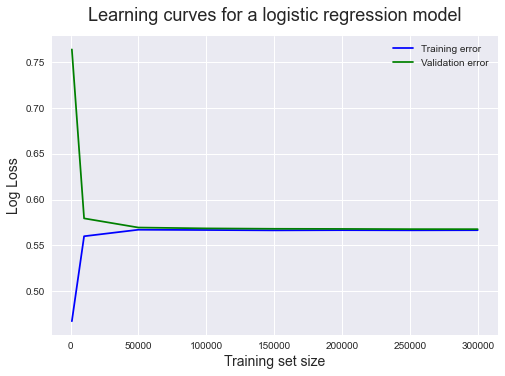

In [370]:
visualization.plot_learning_curve(train_sizes, train_scores, validation_scores, "Log Loss", "Training set size", "Learning curves for a logistic regression model")

Seeing this plot we can appreciate that after the training set of 50000 samples, the validation and training curves had already converged and the additional data starting from that point it will not help to improve the performance of the model. Then, for further training of the model I could delete a huge amount of the data to speed up the training process.

I am going to try a different algorithm, so it is not for sure that this will happen for my next learning algorithm but let´s take this as a reference and start from a smaller dataset to a bigger one. Also, the algorihm I am choosing, the RandomForest, is way slower than the Logistic Regression...

### Random Forest Classifier

In [302]:
from sklearn.model_selection import train_test_split

In [371]:
X_train_smoted, X_waste_smoted, y_train_smoted, y_waste_smoted = train_test_split(X_smoted, y_smoted, test_size=0.80, random_state=42, stratify=y_smoted)

In [374]:
print(X_train_smoted.shape)
count_arr = np.bincount(y_train_smoted)
print('Total occurences of "0" in array: ', count_arr[0])
print('Total occurences of "1" in array: ', count_arr[1])

(75759, 244)
Total occurences of "0" in array:  37879
Total occurences of "1" in array:  37880


In [375]:
parameters = {
    'max_features':(1,2,3,4,5, 'sqrt', 'log2','None'),
    'max_depth' : [1,2,3,4,5,6,7,8,'None'],
    'criterion' :['gini', 'entropy','log_loss'],
    'min_samples_leaf':[1,2,3,4,5,6,7,8], 
    }

estimator = RandomForestClassifier(random_state=1)
cv=3
scoring="neg_log_loss"

best_grid = evaluation.grid_search(estimator, parameters, cv, scoring, X_train_smoted, y_train_smoted)

The time it takes to fit the model is 14415 seconds.
Best params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1}


In [376]:
evaluation.get_errors(best_grid.cv_results_)

Training Log Loss 0.44, CV Log Loss 0.44
Train/Validation: 1.0


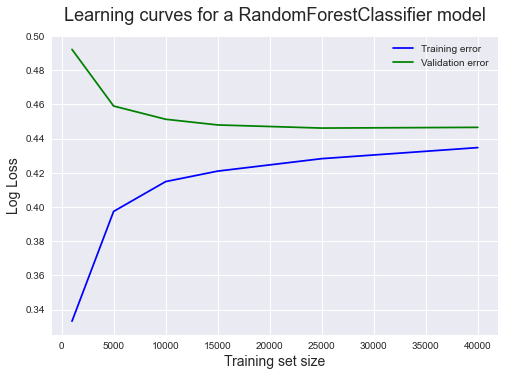

In [377]:
train_sizes, train_scores, validation_scores = learning_curve(best_grid.best_estimator_, X_train_smoted, y_train_smoted, cv=5, scoring="neg_log_loss", n_jobs=-1, train_sizes=[1000,5000,10000,15000,25000,40000], shuffle=True, random_state=1)
visualization.plot_learning_curve(train_sizes, train_scores, validation_scores, "Log Loss", "Training set size", "Learning curves for a RandomForestClassifier model")

Performance metrics:
------------------------------
Accuracy: 0.830940391608116
Precision: 0.17582814986257775
Recall: 0.2967529296875
F1 Score: 0.22081932963938594

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     93287
           1       0.18      0.30      0.22      8192

    accuracy                           0.83    101479
   macro avg       0.56      0.59      0.56    101479
weighted avg       0.87      0.83      0.85    101479


Prediction Confusion Matrix:
------------------------------
       0      1
0  81892  11395
1   5761   2431


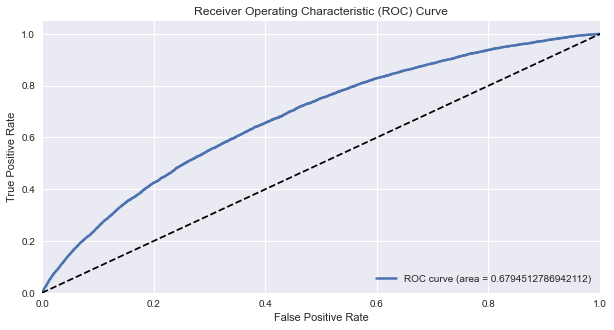

In [378]:
evaluation.compare_models(best_grid.best_estimator_, X_train_smoted, y_train_smoted, X_test, y_test, 0.5)

### Using Scikit Learn Pipelines 

So far, I've created special functions or blocks or code to chain operations on data and then train the models. This was done for a didactic purpose, but, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

In [439]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.over_sampling import SMOTE
import preprocesing


Dataset and variables assignation

In [456]:
#"Data" is the dataset we got after the Correlation elimination step on the EDA
data_pipe = data.copy()

#We have to make the preprocessing steps which can not be included on the Pipeline as they are not Scikit-Learn pipe methods
preprocesing.error_elimination(data_pipe)
data_pipe = preprocesing.detecting_filling(data_pipe, new_numerical_features)

#Creating X and y variables
X = data_pipe.drop(['TARGET','SK_ID_CURR'], axis=1)
y = data_pipe["TARGET"]

#Spliting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Pipeline Creation

In [469]:
#Creating pipeline for Numerical features
numerical_pipe = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'), StandardScaler())

#Creating pipeline for Categorical features
categorical_pipe = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

#Creating Column Tranforme Component
preprocessor = make_column_transformer((numerical_pipe, selector(dtype_include='number')), (categorical_pipe, selector(dtype_include='category')), n_jobs=2)

#Creating Main pipeline
pipe = make_pipeline_with_sampler(preprocessor, SMOTE(random_state = 2), LogisticRegression(max_iter=100000))

In [470]:
#Cross Validation without GridSearch
cv_result = cross_validate(pipe, X_train, y_train, scoring="neg_log_loss", cv=5, return_train_score=True, error_score='raise')
error_cv = evaluation.calculating_error(scores, "test_score")
error_tr = evaluation.calculating_error(scores, "train_score")
print(f"Training Log Loss Error {error_tr:0.2f}, CV Log Loss Error {error_cv:0.2f}")
print('Train/Validation: {}'.format(round(error_cv/error_tr, 1)))

Training Log Loss Error 0.57, CV Log Loss Error 0.57
Train/Validation: 1.0


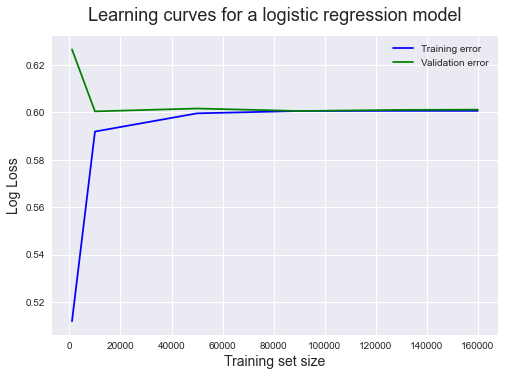

In [460]:
train_sizes, train_scores, validation_scores = learning_curve(pipe, X_train, y_train, cv=5, scoring="neg_log_loss", n_jobs=-1, train_sizes=[1000,10000,50000,90000,130000, 160000], shuffle=True, random_state=1)
visualization.plot_learning_curve(train_sizes, train_scores, validation_scores, "Log Loss", "Training set size", "Learning curves for a logistic regression model")

If we observe the previous performance of the Logistic Regression model trained on the same data, but preprocessed "manually", the results is the same for the losses, 0.57.